In [1]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

C:\Users\Saisha\AppData\Local\Temp\ipykernel_12436\1399653654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#  Building our Model To train the data 

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [7]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= r"C:\Users\Saisha\OneDrive\Desktop\EmotionDetectionProject\Emotion-detection-main\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_data = val_datagen.flow_from_directory(
    directory=r"C:\Users\Saisha\OneDrive\Desktop\EmotionDetectionProject\Emotion-detection-main\test",
    target_size=(224,224),
    batch_size=32,
)


Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

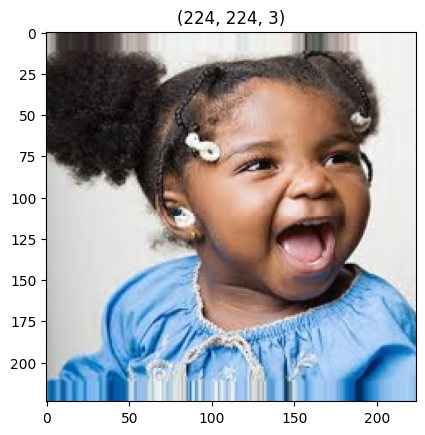

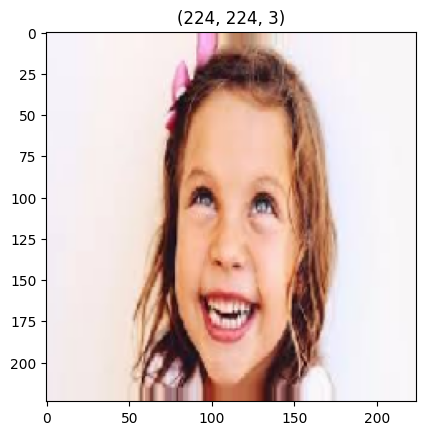

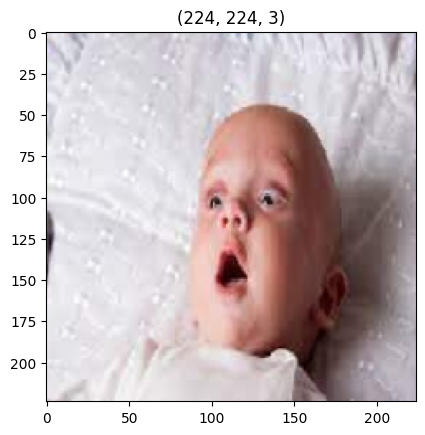

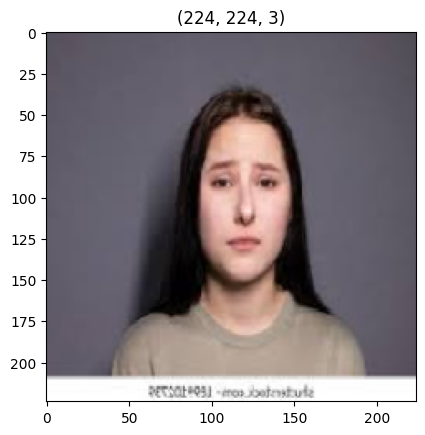

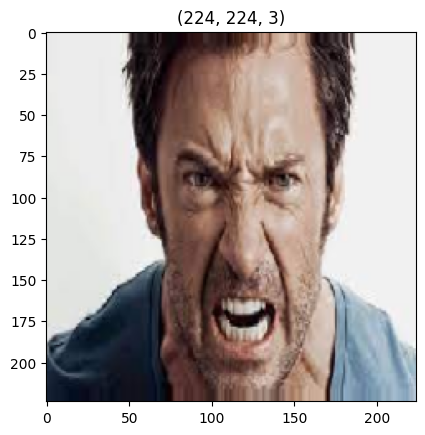

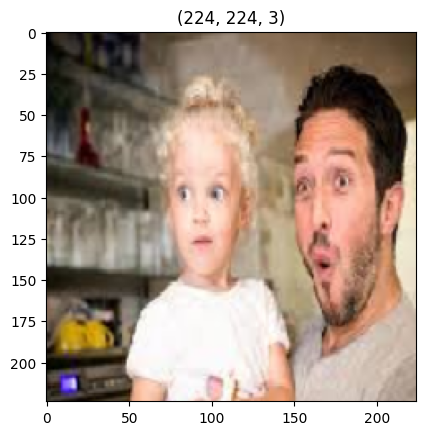

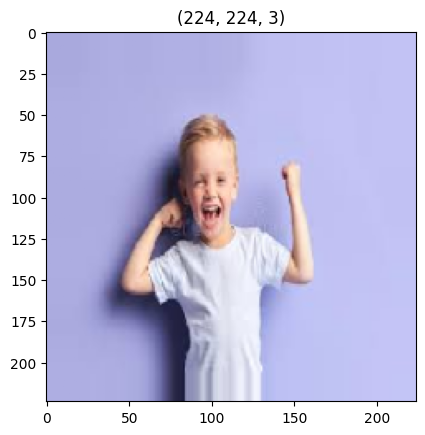

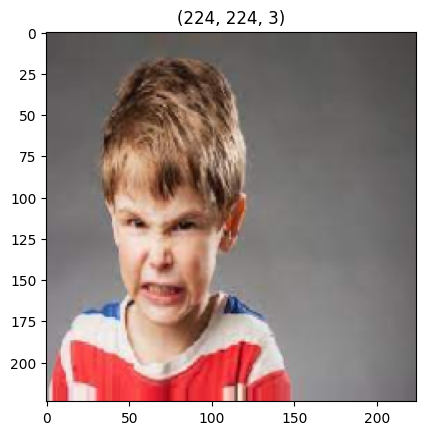

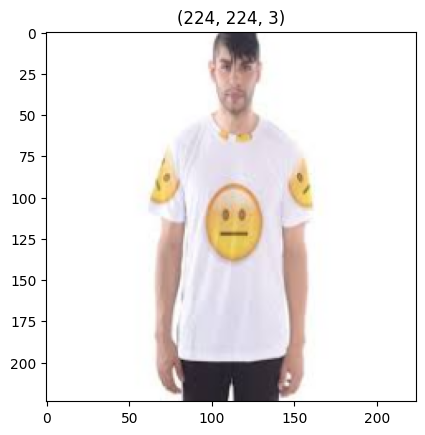

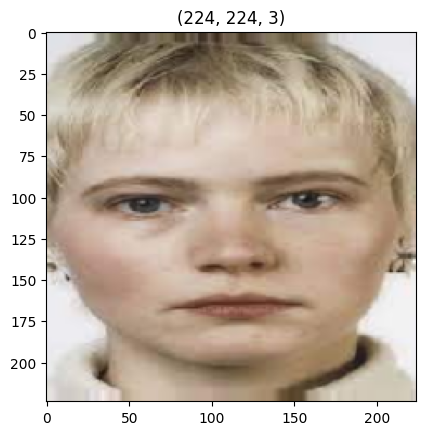

In [9]:
# to visualize the images in the traing data denerator 

t_img , label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [10]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [11]:
hist = model.fit(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

c:\Users\Saisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.1658 - loss: 10.1986
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1687 - loss: 10.2371 - val_accuracy: 0.4844 - val_loss: 4.1687
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.3438 - loss: 6.6163

c:\Users\Saisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.48438 to 0.52734, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.3438 - loss: 6.6163 - val_accuracy: 0.5273 - val_loss: 3.2329
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.5401 - loss: 3.5562
Epoch 3: val_accuracy improved from 0.52734 to 0.73438, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5461 - loss: 3.5021 - val_accuracy: 0.7344 - val_loss: 1.7587
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.6667 - loss: 1.8562
Epoch 4: val_accuracy improved from 0.73438 to 0.76172, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.6667 - loss: 1.8562 - val_accuracy: 0.7617 - val_loss: 1.5064
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.7750 - loss: 1.7495
Epoch 5: val_accuracy improved from 0.76172 to 0.83203, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7731 - loss: 1.7392 - val_accuracy: 0.8320 - val_loss: 1.0380
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.8333 - loss: 1.1311
Epoch 6: val_accuracy improved from 0.83203 to 0.83594, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - accuracy: 0.8333 - loss: 1.1311 - val_accuracy: 0.8359 - val_loss: 0.8640
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.8369 - loss: 0.9150
Epoch 7: val_accuracy improved from 0.83594 to 0.91406, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8372 - loss: 0.9031 - val_accuracy: 0.9141 - val_loss: 0.2631
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.9688 - loss: 0.1104
Epoch 8: val_accuracy improved from 0.91406 to 0.92188, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.9688 - loss: 0.1104 - val_accuracy: 0.9219 - val_loss: 0.2394
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8987 - loss: 0.6296
Epoch 9: val_accuracy did not improve from 0.92188
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8984 - loss: 0.6227 - val_accuracy: 0.9180 - val_loss: 0.4113
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.9062 - loss: 0.6209
Epoch 10: val_accuracy improved from 0.92188 to 0.92969, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 468ms/step - accuracy: 0.9062 - loss: 0.6209 - val_accuracy: 0.9297 - val_loss: 0.4041
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.8900 - loss: 0.4731
Epoch 11: val_accuracy improved from 0.92969 to 0.98047, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8931 - loss: 0.4589 - val_accuracy: 0.9805 - val_loss: 0.0642
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.9062 - loss: 0.6345
Epoch 12: val_accuracy improved from 0.98047 to 0.98438, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - accuracy: 0.9062 - loss: 0.6345 - val_accuracy: 0.9844 - val_loss: 0.0739
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9716 - loss: 0.1381
Epoch 13: val_accuracy did not improve from 0.98438
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9710 - loss: 0.1427 - val_accuracy: 0.9805 - val_loss: 0.0935
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.9375 - loss: 0.3143
Epoch 14: val_accuracy improved from 0.98438 to 0.99219, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.9375 - loss: 0.3143 - val_accuracy: 0.9922 - val_loss: 0.0293
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.9836 - loss: 0.0572
Epoch 15: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9831 - loss: 0.0633 - val_accuracy: 0.9922 - val_loss: 0.0337
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.9375 - loss: 0.1330
Epoch 16: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.9375 - loss: 0.1330 - val_accuracy: 0.9883 - val_loss: 0.0507
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9839 - loss: 0.1063
Epoch 17: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9828 - loss: 0.1109 - val_accuracy: 0.9922 - val_loss: 0.0283
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.9688 - loss: 0.0878
Epoch 18: val_accuracy did not i

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9716 - loss: 0.0941 - val_accuracy: 0.9961 - val_loss: 0.0076
Epoch 19: early stopping


In [12]:
# Loading the best fit model 
from keras.models import load_model
model = load_model(r"C:\Users\Saisha\OneDrive\Desktop\EmotionDetectionProject\Emotion-detection-main\best_model.h5")

In [13]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

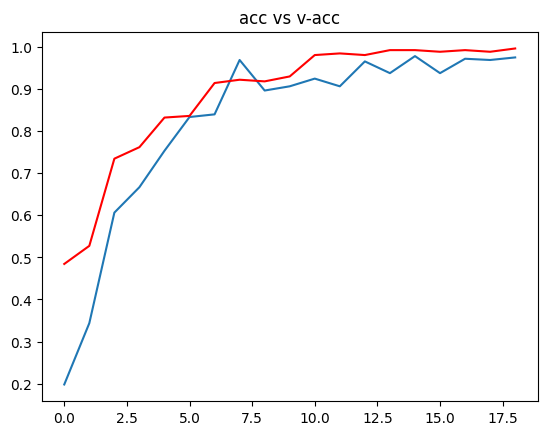

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

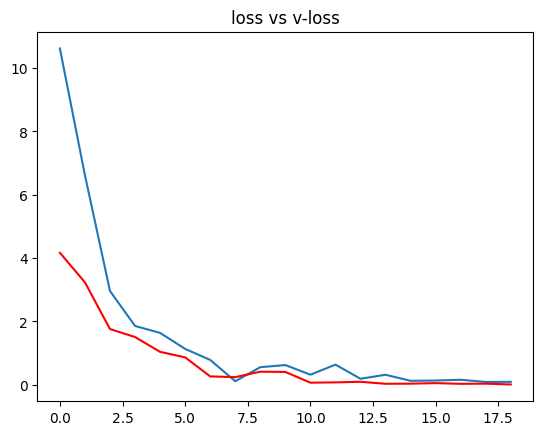

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
 the image is of Fear


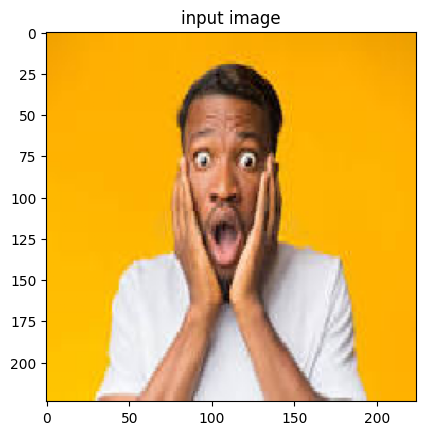

In [17]:
# path for the image to see if it predics correct class

path = r"C:\Users\Saisha\OneDrive\Desktop\EmotionDetectionProject\Emotion-detection-main\surprise.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()